In [240]:
import networkx as nx

In [34]:
import sqlite3 as lite
import pandas as pd
con = lite.connect('../../examples/cyclus.sqlite')
con.row_factory = lite.Row
cur =con.cursor()

x = cur.execute('SELECT * FROM transactions').fetchall()
agentids = cur.execute('SELECT * FROM agententry').fetchall()

In [36]:
id_dict = {k:v for k,v in zip([q['agentid'] for q in agentids], [q['prototype'] for q in agentids])}

In [37]:
q = cur.execute('pragma table_info(transactions)').fetchall()
q = [w['name'] for w in q]
q

['SimId',
 'TransactionId',
 'SenderId',
 'ReceiverId',
 'ResourceId',
 'Commodity',
 'Time']

In [38]:
df = pd.DataFrame(x)
df.columns = q

In [41]:
df['receiver'] = [id_dict[q] for q in df['ReceiverId']]
df['sender'] = [id_dict[q] for q in df['SenderId']]

In [58]:
set(df['receiver'])

{'12_SMR',
 'ABR',
 'ANO-1',
 'ANO-2',
 'AP1000',
 'BEAVER_VALLEY-1',
 'BEAVER_VALLEY-2',
 'BRAIDWOOD-1',
 'BRAIDWOOD-2',
 'BROWNS_FERRY-1',
 'BROWNS_FERRY-2',
 'BROWNS_FERRY-3',
 'BRUNSWICK-1',
 'BRUNSWICK-2',
 'BYRON-1',
 'BYRON-2',
 'CALLAWAY-1',
 'CALVERT_CLIFFS-1',
 'CALVERT_CLIFFS-2',
 'CATAWBA-1',
 'CATAWBA-2',
 'CLINTON-1',
 'COLUMBIA',
 'COMANCHE_PEAK-1',
 'COMANCHE_PEAK-2',
 'COOK-1',
 'COOK-2',
 'COOPER',
 'DAVIS_BESSE-1',
 'DIABLO_CANYON-1',
 'DIABLO_CANYON-2',
 'DRESDEN-2',
 'DRESDEN-3',
 'DUANE_ARNOLD-1',
 'FARLEY-1',
 'FARLEY-2',
 'FERMI-2',
 'FITZPATRICK',
 'FORT_CALHOUN-1',
 'GINNA',
 'GRAND_GULF-1',
 'HARRIS-1',
 'HATCH-1',
 'HATCH-2',
 'HOPE_CREEK-1',
 'INDIAN_POINT-2',
 'INDIAN_POINT-3',
 'LASALLE-1',
 'LASALLE-2',
 'LIMERICK-1',
 'LIMERICK-2',
 'MCGUIRE-1',
 'MCGUIRE-2',
 'MILLSTONE-2',
 'MILLSTONE-3',
 'MONTICELLO',
 'NINE_MILE_POINT-1',
 'NINE_MILE_POINT-2',
 'NORTH_ANNA-1',
 'NORTH_ANNA-2',
 'OCONEE-1',
 'OCONEE-2',
 'OCONEE-3',
 'OYSTER_CREEK',
 'PALISADES',
 '

In [60]:
only_sender = []
only_receiver = []
s = list(set(df['sender']))
r = list(set(df['receiver']))
for i in s:
    if i not in r and i not in only_sender:
        only_sender.append(i)
for i in r:
    if i not in s and i not in only_receiver:
        only_receiver.append(i)
print(only_sender)
print(only_receiver)

['nat_u_source']
['SomeSink']


In [86]:
import numpy as np
flow = []
flow_dict_list = []
flow.append(only_sender)
getout = False
while True:
    # get all the commodities it sends
    commods = list(set(df[df['sender'].isin(flow[-1])]['Commodity']))
    if commods == []:
        break
    print('commods')
    print(commods)
    d = {}
    rs = []
    for commod in commods:
        d[commod] = list(set(df[df['Commodity'] == commod]['receiver']))
        #d[commod] = [q for q in d[commod] if q not in np.array(flow).flatten()]
        rs.extend(d[commod])
    flow.append(rs)
    flow_dict_list.append(d)
    
        
flow

commods
['natl_u']
commods
['depu', 'uox']
commods
['abr_in', 'uox_waste']
commods
['abr_out', 'uox_waste_cooled']
commods
['reprocess_waste', 'tru']
commods
['abr_in']
commods
['abr_out']


[['nat_u_source'],
 ['enrichment'],
 ['mixer',
  'OCONEE-3',
  'SUSQUEHANNA-1',
  'PRAIRIE_ISLAND-1',
  'QUAD_CITIES-2',
  'NINE_MILE_POINT-2',
  'SALEM-1',
  'COOK-1',
  'SOUTH_TEXAS-2',
  'DUANE_ARNOLD-1',
  'DIABLO_CANYON-1',
  'CALVERT_CLIFFS-1',
  'RIVER_BEND-1',
  'NORTH_ANNA-1',
  'WATERFORD-3',
  'ST._LUCIE-2',
  'MILLSTONE-3',
  'SURRY-1',
  'SUMMER-1',
  'COOK-2',
  'DRESDEN-3',
  'CATAWBA-2',
  'PERRY-1',
  'BEAVER_VALLEY-2',
  'COMANCHE_PEAK-2',
  'OCONEE-2',
  'BYRON-2',
  'PEACH_BOTTOM-3',
  'CATAWBA-1',
  'SEQUOYAH-1',
  'GINNA',
  'NORTH_ANNA-2',
  'POINT_BEACH-2',
  'ROBINSON-2',
  'LASALLE-2',
  'PALO_VERDE-3',
  'PALO_VERDE-2',
  'SEQUOYAH-2',
  'BYRON-1',
  'MONTICELLO',
  'QUAD_CITIES-1',
  'PRAIRIE_ISLAND-2',
  'HARRIS-1',
  'LASALLE-1',
  'SALEM-2',
  'CALLAWAY-1',
  'NINE_MILE_POINT-1',
  'BRAIDWOOD-1',
  'THREE_MILE_ISLAND-1',
  'PALO_VERDE-1',
  'PALISADES',
  'TURKEY_POINT-4',
  'BRUNSWICK-2',
  'BROWNS_FERRY-2',
  'INDIAN_POINT-2',
  'BEAVER_VALLEY-1',
  'WA

In [105]:
already = []
flow_clean = []
for i in flow:
    i = [q for q in i if q not in already]
    already.extend(i)
    flow_clean.append(i)
flow_clean = [q for q in flow_clean if len(q) != 0]


[['nat_u_source'],
 ['enrichment'],
 ['mixer',
  'OCONEE-3',
  'SUSQUEHANNA-1',
  'PRAIRIE_ISLAND-1',
  'QUAD_CITIES-2',
  'NINE_MILE_POINT-2',
  'SALEM-1',
  'COOK-1',
  'SOUTH_TEXAS-2',
  'DUANE_ARNOLD-1',
  'DIABLO_CANYON-1',
  'CALVERT_CLIFFS-1',
  'RIVER_BEND-1',
  'NORTH_ANNA-1',
  'WATERFORD-3',
  'ST._LUCIE-2',
  'MILLSTONE-3',
  'SURRY-1',
  'SUMMER-1',
  'COOK-2',
  'DRESDEN-3',
  'CATAWBA-2',
  'PERRY-1',
  'BEAVER_VALLEY-2',
  'COMANCHE_PEAK-2',
  'OCONEE-2',
  'BYRON-2',
  'PEACH_BOTTOM-3',
  'CATAWBA-1',
  'SEQUOYAH-1',
  'GINNA',
  'NORTH_ANNA-2',
  'POINT_BEACH-2',
  'ROBINSON-2',
  'LASALLE-2',
  'PALO_VERDE-3',
  'PALO_VERDE-2',
  'SEQUOYAH-2',
  'BYRON-1',
  'MONTICELLO',
  'QUAD_CITIES-1',
  'PRAIRIE_ISLAND-2',
  'HARRIS-1',
  'LASALLE-1',
  'SALEM-2',
  'CALLAWAY-1',
  'NINE_MILE_POINT-1',
  'BRAIDWOOD-1',
  'THREE_MILE_ISLAND-1',
  'PALO_VERDE-1',
  'PALISADES',
  'TURKEY_POINT-4',
  'BRUNSWICK-2',
  'BROWNS_FERRY-2',
  'INDIAN_POINT-2',
  'BEAVER_VALLEY-1',
  'WA

In [112]:
maxy = 200
maxx = 60
x_coords = np.linspace(0, maxx, len(flow_clean))
y_coords = np.linspace(0, maxy, max([len(q) for q in flow_clean]))
print(x_coords)
print(y_coords)

[ 0. 15. 30. 45. 60.]
[  0.           1.94174757   3.88349515   5.82524272   7.76699029
   9.70873786  11.65048544  13.59223301  15.53398058  17.47572816
  19.41747573  21.3592233   23.30097087  25.24271845  27.18446602
  29.12621359  31.06796117  33.00970874  34.95145631  36.89320388
  38.83495146  40.77669903  42.7184466   44.66019417  46.60194175
  48.54368932  50.48543689  52.42718447  54.36893204  56.31067961
  58.25242718  60.19417476  62.13592233  64.0776699   66.01941748
  67.96116505  69.90291262  71.84466019  73.78640777  75.72815534
  77.66990291  79.61165049  81.55339806  83.49514563  85.4368932
  87.37864078  89.32038835  91.26213592  93.2038835   95.14563107
  97.08737864  99.02912621 100.97087379 102.91262136 104.85436893
 106.7961165  108.73786408 110.67961165 112.62135922 114.5631068
 116.50485437 118.44660194 120.38834951 122.33009709 124.27184466
 126.21359223 128.15533981 130.09708738 132.03883495 133.98058252
 135.9223301  137.86407767 139.80582524 141.74757282 143

In [241]:
len(y_coords)

104

In [160]:
uniq_commods = list(set(df['Commodity']))
color_dict = {k:v for k,v in zip(uniq_commods, np.linspace(0, 1, len(uniq_commods)))}
color_dict

uniq_arches_ = cur.execute('SELECT * from AgentEntry WHERE Kind=="Facility"').fetchall()
uniq_arches = list(set([q['Spec'] for q in uniq_arches_]))
protos = list(set([q['Prototype'] for q in uniq_arches_]))
arche_color = {k:v for k,v in zip(uniq_arches, np.linspace(0, 1, len(uniq_arches)))}
proto_arche_dict = {k:v for k,v in zip([q['Prototype'] for q in uniq_arches_], [q['Spec'] for q in uniq_arches_])}
proto_color = {proto:arche_color[proto_arche_dict[proto]] for proto in protos}

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

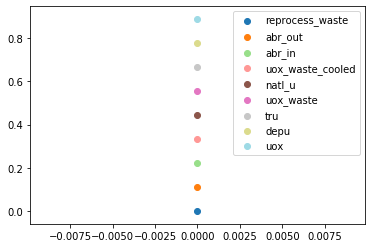

In [196]:

keys = list(color_dict.keys())
for indx, i in enumerate(keys):
    plt.scatter(0, indx / len(keys), c=matplotlib.cm.get_cmap('tab20')(color_dict[i]), label=i)
plt.legend()

In [183]:
color_dict

{'reprocess_waste': 0.0,
 'abr_out': 0.125,
 'abr_in': 0.25,
 'uox_waste_cooled': 0.375,
 'natl_u': 0.5,
 'uox_waste': 0.625,
 'tru': 0.75,
 'depu': 0.875,
 'uox': 1.0}

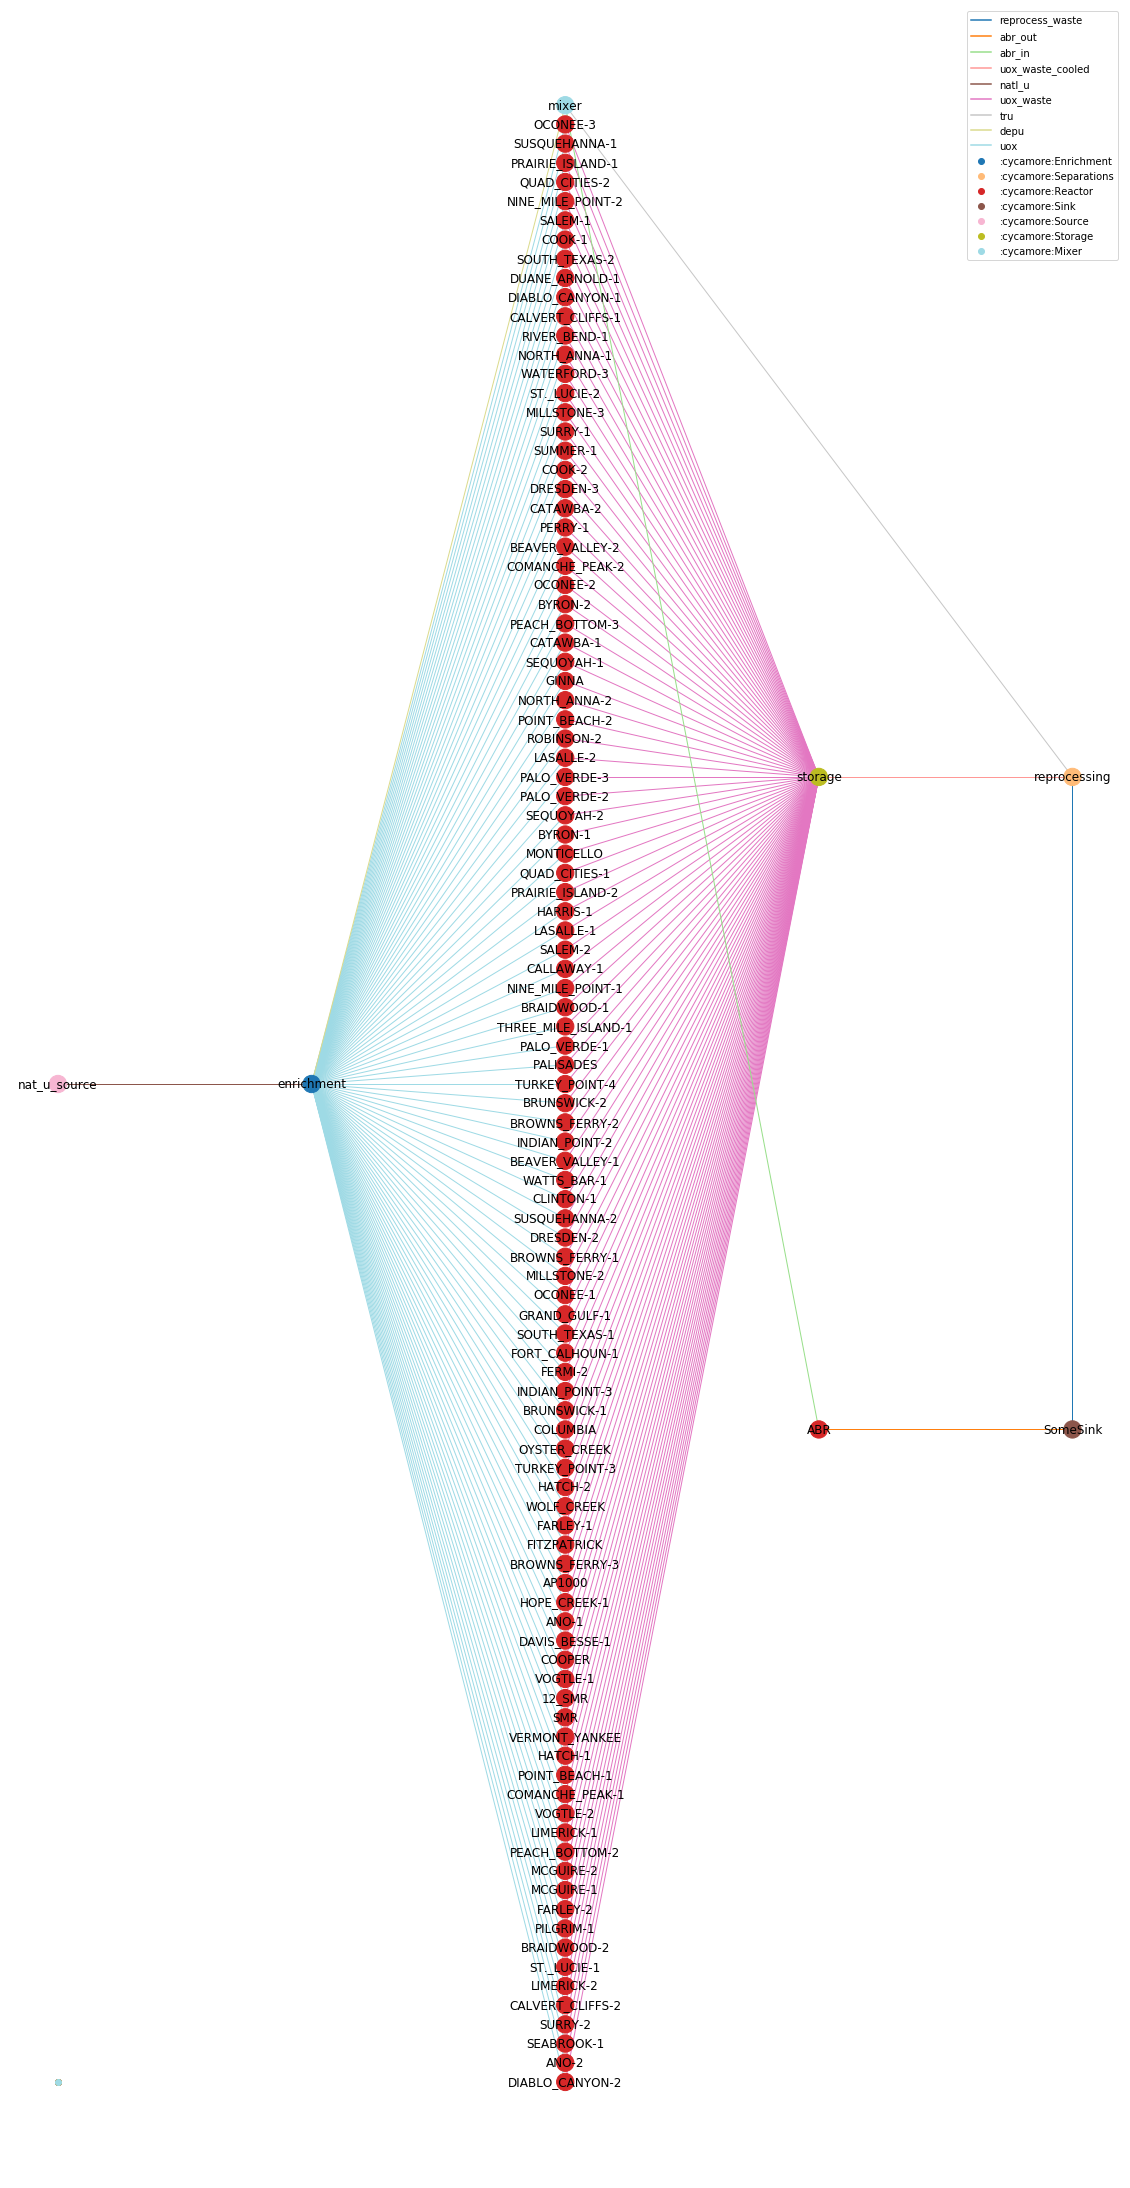

In [243]:
# import matplotlib
plt.rcParams['image.cmap'] = 'tab20'
plt.figure(figsize=(20,40))
G= nx.Graph()
node_colors = []
for indx, val in enumerate(flow_clean):
    n = len(val)
    if not n == len(y_coords):
        new_y_coords = y_coords[::int(len(y_coords)/(n+1))][1:]
    else:
        # hacky way to put mixer on top
        val = val[::-1]
        new_y_coords = y_coords
    for indx2, val2 in enumerate(val):
        G.add_node(val2, pos=(x_coords[indx], new_y_coords[indx2]), color=proto_color[val2])

pos = nx.get_node_attributes(G, 'pos')
n = df.drop_duplicates(subset=['sender','receiver'])

for indx, row in n.iterrows():
    G.add_edge(row['sender'], row['receiver'], color=matplotlib.cm.get_cmap('tab20')(color_dict[row['Commodity']]))

edges = G.edges()
edge_colors = [G[u][v]['color'] for u, v in edges]
nodes = G.nodes()
node_colors = list(nx.get_node_attributes(G, 'color').values())


f = plt.figure(1)
ax = f.add_subplot(1,1,1)
for key, val in arche_color.items():
    ax.scatter([0], [0], c=[matplotlib.cm.get_cmap('tab20')(val)], label=key)
for key, val in color_dict.items():
    ax.plot([0], [0], color=matplotlib.cm.get_cmap('tab20')(val), label=key)

nx.draw(G, pos, with_labels=True, edge_color=edge_colors, node_color=node_colors, ax=ax, arrows=True)

plt.legend()


In [208]:
G.edgelist

AttributeError: 'Graph' object has no attribute 'edgelist'

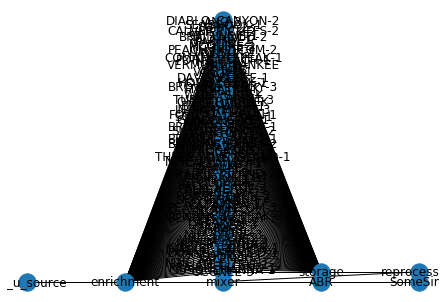

In [133]:
G = nx.Graph()
x = 0
y = 0
xlist = []
ylist = []
already = []
G.add_node(only_sender[0], pos=(x,y))
for i in flow_dict_list:
    x += 5
    y = 0
    for key, val in i.items():
        if key != list(i.keys())[0]:
            y += 3
        for j in val:
            if j in already:
                continue
            G.add_node(j, pos=(x,y))
            already.append(j)
            xlist.append(x)
            ylist.append(y)
            y += 1
            
            
pos = nx.get_node_attributes(G, 'pos')

#K = nx.from_pandas_edgelist(df, 'sender', 'receiver', edge_attr=True)
nx.draw(G, pos, with_labels=True)

,SimId,TransactionId,SenderId,ReceiverId,ResourceId,Commodity,Time,receiver,sender
0,b'3\x83k\x0e\xa7\xb3M5\xb4[o\xc9\x10\x12\xd2p',0,615,578,1769,uox,1,SUMMER-1,enrichment
3,b'3\x83k\x0e\xa7\xb3M5\xb4[o\xc9\x10\x12\xd2p',3,615,547,1211,uox,1,PILGRIM-1,enrichment
6,b'3\x83k\x0e\xa7\xb3M5\xb4[o\xc9\x10\x12\xd2p',6,615,536,1013,uox,1,DIABLO_CANYON-1,enrichment
9,b'3\x83k\x0e\xa7\xb3M5\xb4[o\xc9\x10\x12\xd2p',9,615,528,869,uox,1,MONTICELLO,enrichment
12,b'3\x83k\x0e\xa7\xb3M5\xb4[o\xc9\x10\x12\xd2p',12,615,587,1931,uox,1,LIMERICK-1,enrichment
15,b'3\x83k\x0e\xa7\xb3M5\xb4[o\xc9\x10\x12\xd2p',15,615,589,1967,uox,1,MILLSTONE-3,enrichment
18,b'3\x83k\x0e\xa7\xb3M5\xb4[o\xc9\x10\x12\xd2p',18,615,599,2147,uox,1,CALLAWAY-1,enrichment
21,b'3\x83k\x0e\xa7\xb3M5\xb4[o\xc9\x10\x12\xd2p',21,615,610,2345,uox,1,RIVER_BEND-1,enrichment
24,b'3\x83k\x0e\xa7\xb3M5\xb4[o\xc9\x10\x12\xd2p',24,615,575,1715,uox,1,COLUMBIA,enrichment
27,b'3\x83k\x0e\xa7\xb3M5\xb4[o\xc9\x10\x12\xd2p',27,615,574,1697,uox,1,HATCH-2,enrichment


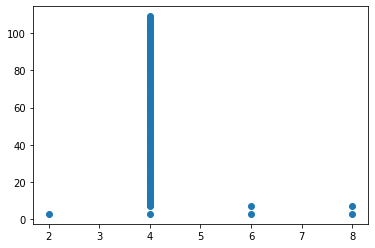

In [95]:
import matplotlib.pyplot as plt
plt.scatter(xlist,ylist)

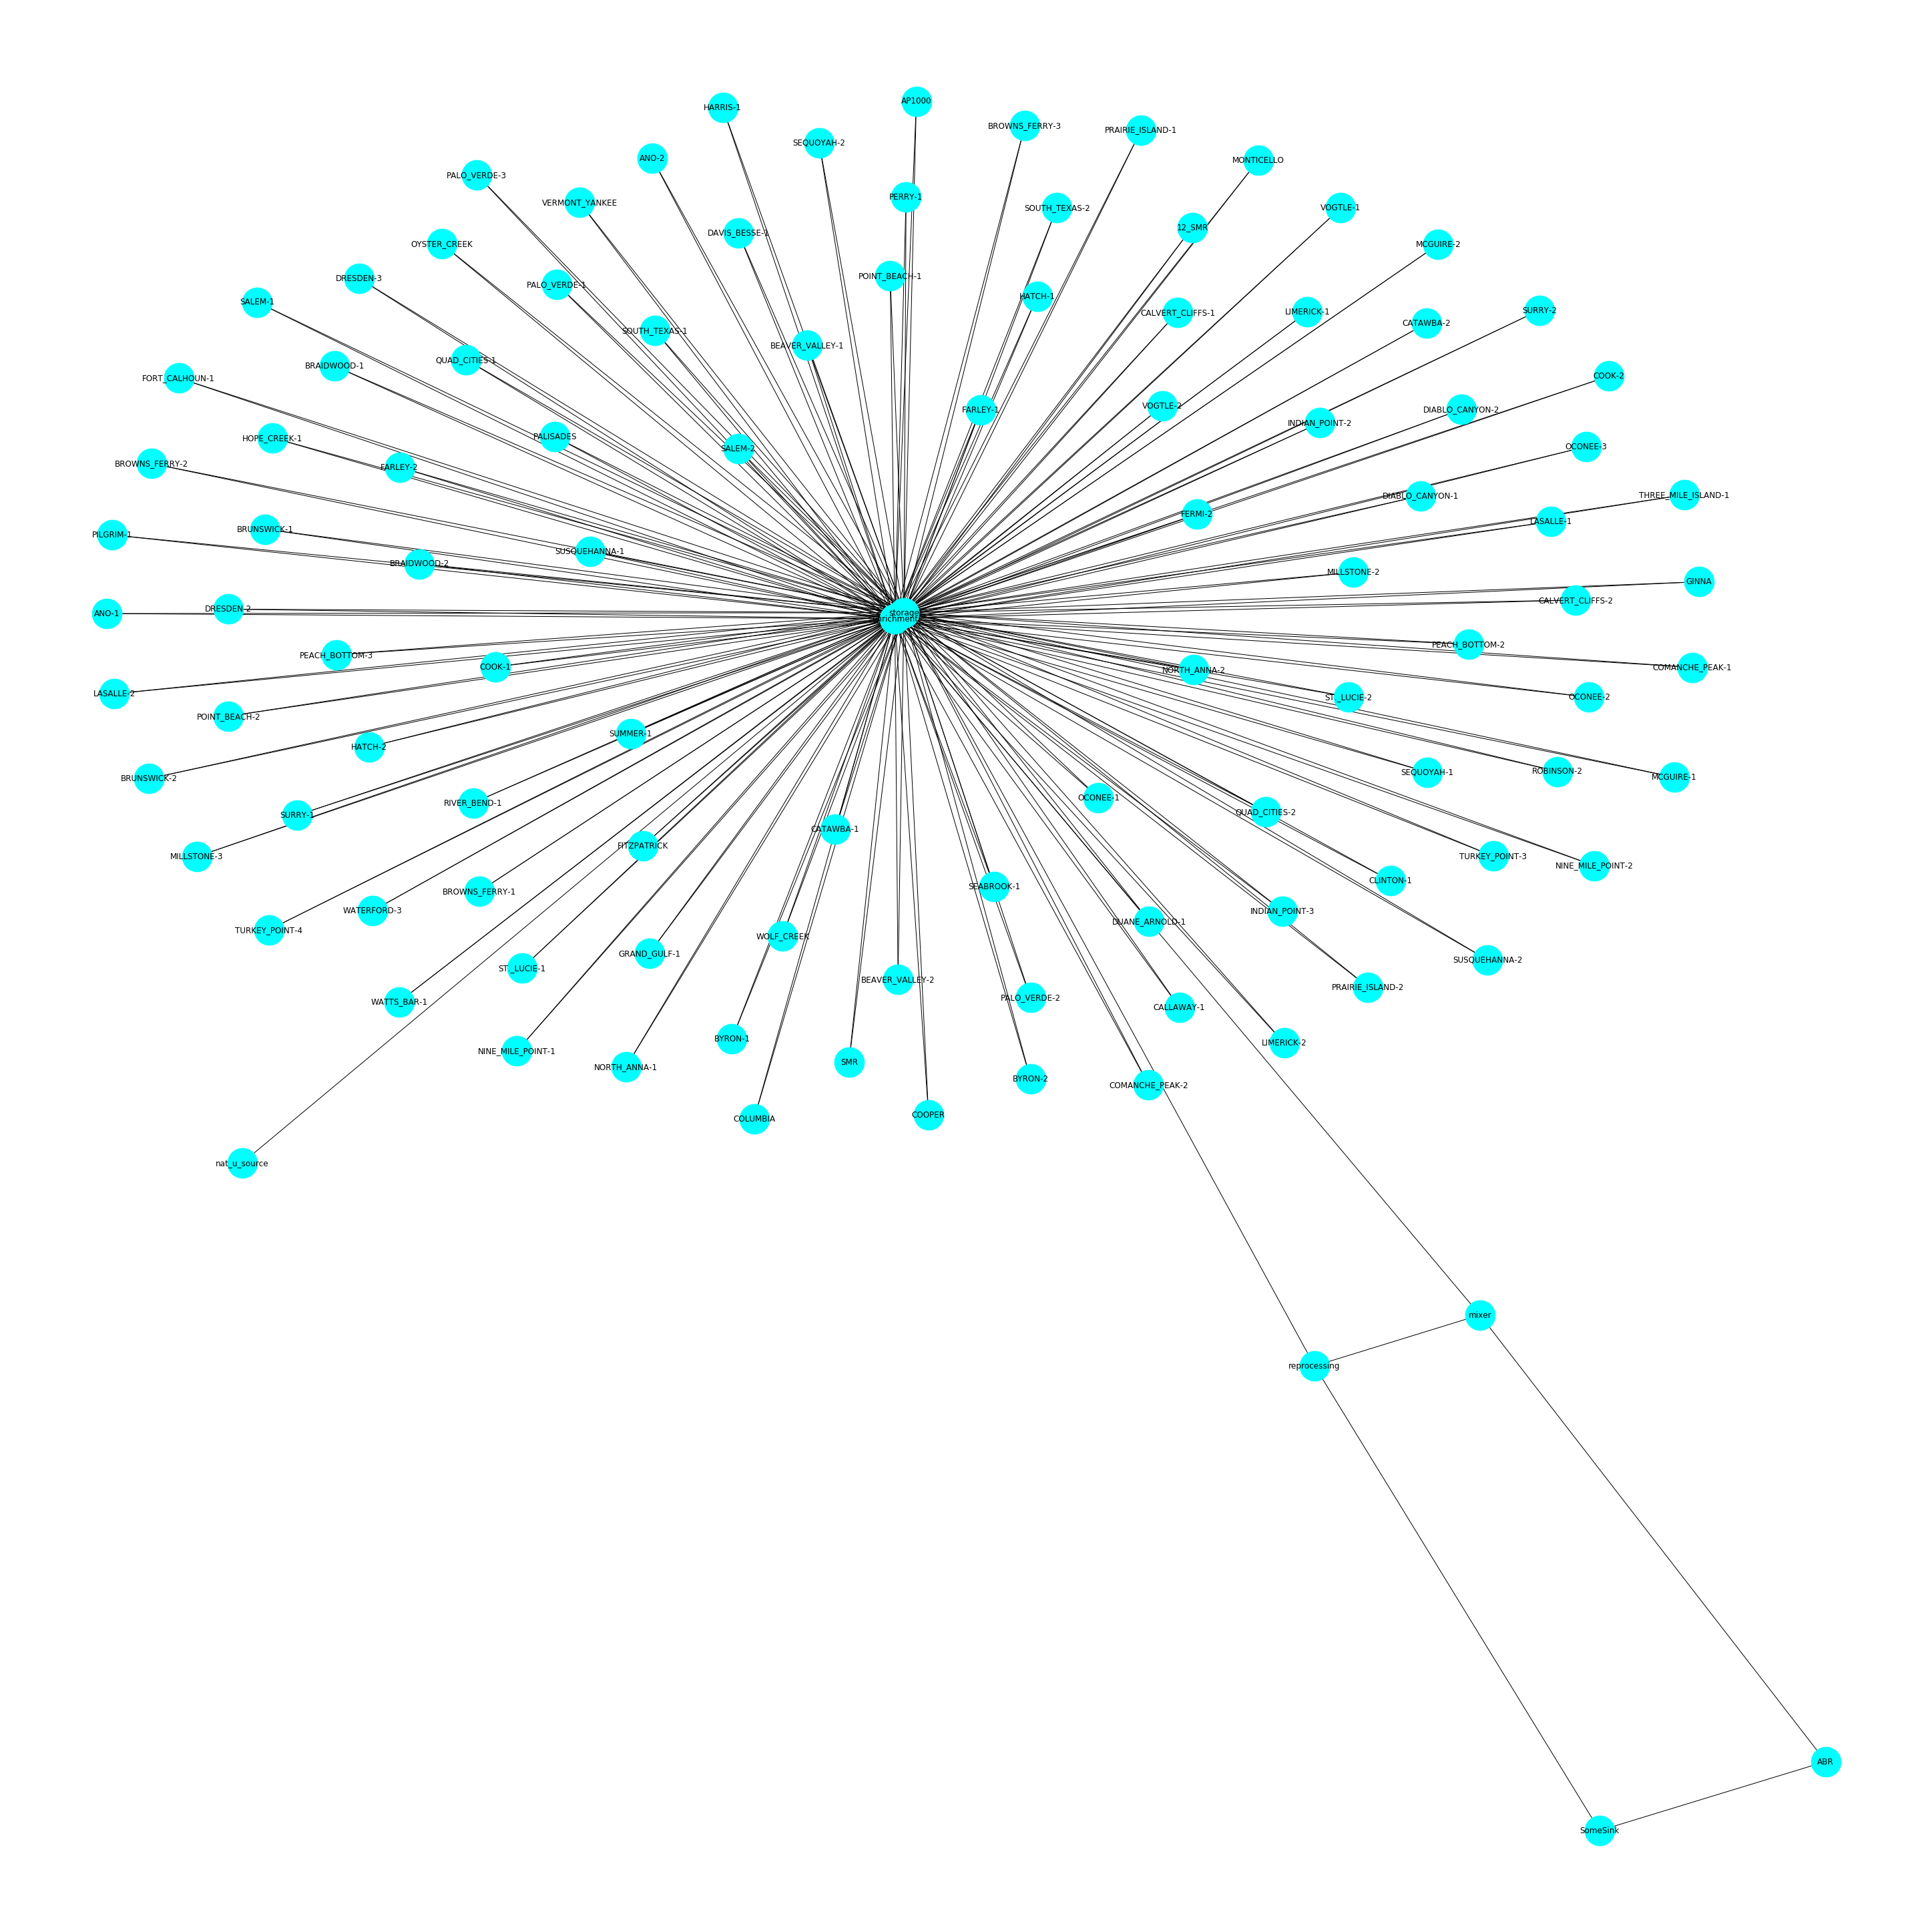

In [51]:
plt.figure(figsize=(40,40))
nx.draw(G, node_size=2000, node_color='cyan', with_labels=True)
plt.savefig('node.png')
plt.show()